# Benzines
see https://www.kaggle.com/code/phamvanvung/partial-least-squares-regression-in-python

In [ ]:
from sys import stdout
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.signal import savgol_filter

from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
! git clone https://github.com/IvanMikhailovIMCRAS/Benzines.git

Cloning into 'Benzines'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 8 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (8/8), 3.85 MiB | 4.55 MiB/s, done.


In [ ]:
y = np.loadtxt("Benzines/Answers.txt")
X = np.loadtxt("Benzines/Spectra.txt")
wl = np.loadtxt("Benzines/Wavenumbers.txt")

In [ ]:
y.shape

(950, 5)

In [ ]:
X.shape

(950, 396)

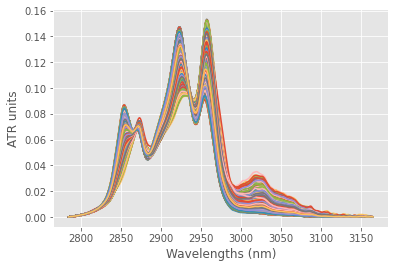

In [ ]:
with plt.style.context('ggplot'):
    plt.plot(wl, X.T)
    plt.xlabel("Wavelengths (nm)")
    plt.ylabel("ATR units")

In [ ]:
X2 = savgol_filter(X, 17, polyorder=2, deriv=2)

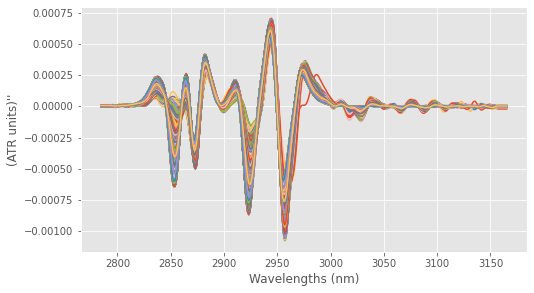

In [ ]:
plt.figure(figsize=(8, 4.5))
with plt.style.context('ggplot'):
    plt.plot(wl, X2.T)
    plt.xlabel("Wavelengths (nm)")
    plt.ylabel("(ATR units)''")
    plt.show()

In [ ]:
def optimise_pls_cv(X, y, n_comp):
    # Define PLS object
    pls = PLSRegression(n_components=n_comp)

    # Cross-validation
    y_cv = cross_val_predict(pls, X, y, cv=5)

    # Calculate scores
    r2 = r2_score(y, y_cv)
    mse = mean_squared_error(y, y_cv)
    rpd = y.std()/np.sqrt(mse)
    
    return (y_cv, r2, mse, rpd)

In [ ]:
# test with 100 components
r2s = []
mses = []
rpds = []
xticks = np.arange(1, 100)
for n_comp in xticks:
    y_cv, r2, mse, rpd = optimise_pls_cv(X2, y, n_comp)
    r2s.append(r2)
    mses.append(mse)
    rpds.append(rpd)

In [ ]:
def plot_metrics(vals, ylabel, objective):
    with plt.style.context('ggplot'):
        plt.plot(xticks, np.array(vals), '-v', color='blue', mfc='blue')
        if objective=='min':
            idx = np.argmin(vals)
        else:
            idx = np.argmax(vals)
        plt.plot(xticks[idx], np.array(vals)[idx], 'P', ms=10, mfc='red')
        print("Extremum in point", xticks[idx])
        plt.xlabel('Number of PLS components')
        plt.xticks = xticks
        plt.ylabel(ylabel)
        plt.title('PLS')

    plt.show()

Extremum in point 70


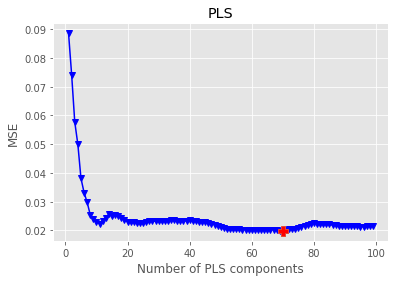

In [ ]:
plot_metrics(mses, 'MSE', 'min')

Extremum in point 70


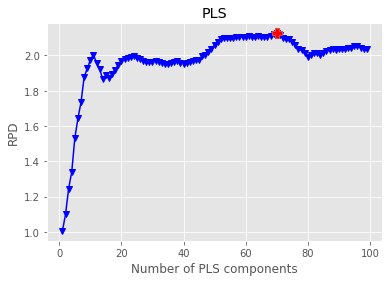

In [ ]:
plot_metrics(rpds, 'RPD', 'max')

Extremum in point 70


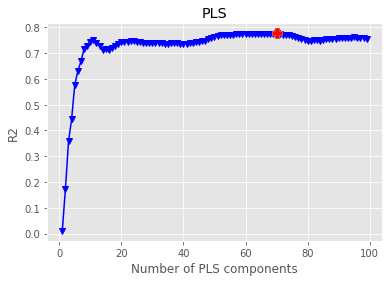

In [ ]:
plot_metrics(r2s, 'R2', 'max')

In [ ]:
y_cv, r2, mse, rpd = optimise_pls_cv(X2, y, 70)
print('R2: %0.4f, MSE: %0.4f, RPD: %0.4f' %(r2, mse, rpd))

R2: 0.7775, MSE: 0.0198, RPD: 2.1254


In [ ]:
num_full = 0
num_part = 0
for true_value, predict_value in zip(y, y_cv):
    t = [int(i>0) for i in true_value]
    tsort = np.argsort(true_value)
    psort = np.argsort(predict_value)
    if sum(t) > 1:
        num_full += int(tsort[-1] in set([psort[-1], psort[-2]]) and
                        tsort[-2] in set([psort[-1], psort[-2]]))
        num_part += int(tsort[-1] in set([psort[-1], psort[-2]]))
    else:
        num_full += int(tsort[-1] == psort[-1])
print("fraction of wrong answers (two components): ", (len(y) - num_full) / len(y))
print("fraction of wrong answers (one maximum component): ", (len(y) - num_part) / len(y) )

fraction of wrong answers (two components):  0.1431578947368421
fraction of wrong answers (one maximum component):  0.04842105263157895
